In [1]:
!pip install tensorflow

     |████████████████████████████████| 207.1 MB 1.4 MB/s            
     |████████████████████████████████| 65 kB 1.4 MB/s            
     |████████████████████████████████| 12.2 MB 2.2 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 42 kB 959 kB/s            
     |████████████████████████████████| 1.6 MB 1.5 MB/s            
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
     |████████████████████████████████| 1.0 MB 1.0 MB/s            
     |████████████████████████████████| 3.1 MB 701 kB/s            
     |████████████████████████████████| 1.3 MB 1.3 MB/s            
     |████████████████████████████████| 57 kB 1.4 MB/s            
     |████████████████████████████████| 5.8 MB 1.5 MB/s            
     |████████████████████████████████| 126 kB 700 kB/s            
     |████████████████████████████████| 4.0 MB 358 kB/s            
     |████████████████████████████████| 463 kB 1.1 MB/s            
     |████████████

In [2]:
!pip install keras

In [3]:
import tensorflow as tf
import keras

In [4]:
print(tf.__version__)

2.7.0


In [5]:
print(keras.__version__)

2.7.0


## 선형회귀란 --> 로지스틱회귀(Logistic Regression)

관찰된 데이터들을 기반으로 하나의 함수를 구해서 관찰되지 않은 데이터의 값을 예측한다.

## matplotlib 학습사이트

https://codetorial.net/matplotlib/index.html

# 실습1 : 바게트빵(길이&가격)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
X = np.array([6, 8, 10, 15, 18])  # 빵의 길이 (train_data) : 학습용데이터
y = np.array([7, 9, 13, 17.7, 19.3]) # 빵의 가격 (train_label) : 학습용정답

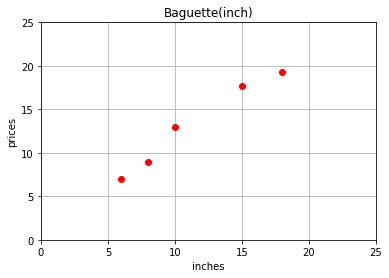

In [9]:
# 데이터 시각화

plt.figure()
plt.plot(X, y, 'ro') # 마커색상 + 마커모양 지정 (red, 동그라미 모양)
plt.title('Baguette(inch)') # 그래프 제목
plt.xlabel('inches') # x축 이름
plt.ylabel('prices') # y축 이름
plt.axis([0, 25, 0, 25]) # 축범위 지정 = axis[x축범위, y축범위]
plt.grid()  # 가로/세로 라인 출력(격자무늬)
plt.show()

- 예측을 위한 데이터의 연결선을 그린다.

In [21]:
# 가중치를 이용하여 선을 그려주는 함수 생성

def linear_func1(data):
    return data * 1.3 - 0.1 # 가중치는 임의로 선언 (가중치 : * 1.3 - 0.1)

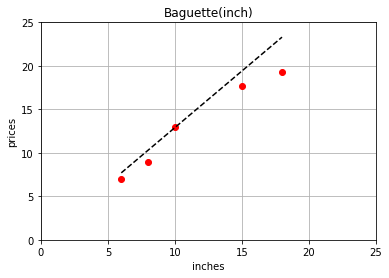

In [11]:
# 데이터 시각화

plt.figure()
plt.plot(X, y, 'ro') # 마커색상 + 마커모양 지정 (red, 동그라미 모양)
plt.plot(X, linear_func1(X), 'k--') # k : 검정색, -- : 점선
plt.title('Baguette(inch)') # 그래프 제목
plt.xlabel('inches') # x축 이름
plt.ylabel('prices') # y축 이름
plt.axis([0, 25, 0, 25]) # 축범위 지정 = axis[x축범위, y축범위]
plt.grid()  # 가로/세로 라인 출력(격자무늬)
plt.show()

In [19]:
# 가중치를 조정

def linear_func2(data):
    return data * 0.8 + 4.04

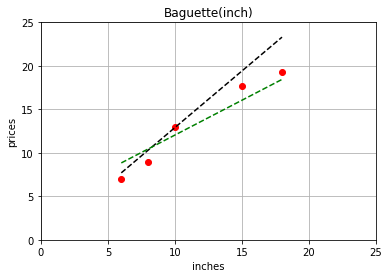

In [22]:
# 데이터 시각화

plt.figure()
plt.plot(X, y, 'ro') # 마커색상 + 마커모양 지정 (red, 동그라미 모양)
plt.plot(X, linear_func1(X), 'k--') # k : 검정색, -- : 점선
plt.plot(X, linear_func2(X), 'g--') # g : 초록색, -- : 점선
plt.title('Baguette(inch)') # 그래프 제목
plt.xlabel('inches') # x축 이름
plt.ylabel('prices') # y축 이름
plt.axis([0, 25, 0, 25]) # 축범위 지정 = axis[x축범위, y축범위]
plt.grid()  # 가로/세로 라인 출력(격자무늬)
plt.show()

- 위의 코드를 컴퓨터에게 학습시킨다.

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [24]:
# 학습 : 현재 선언된 데이터가 1차원배열이기 때문에 에러가 발생한다.
model.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 6  8 10 15 18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

- 데이터 차원 변경 : reshape(행, 열)

In [26]:
X = X.reshape(-1, 1)

In [27]:
# 학습 (y값은 레이블이라서 1차원이여도 상관없다)
model.fit(X, y)

LinearRegression()

In [28]:
# 평가

print("정확도 : ", model.score(X, y))

정확도 :  0.9692125842805129


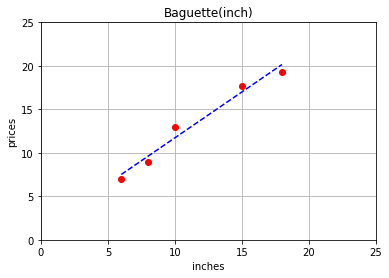

In [29]:
# 데이터 시각화

plt.figure()
plt.plot(X, y, 'ro') # 마커색상 + 마커모양 지정 (red, 동그라미 모양)
plt.plot(X, model.predict(X), 'b--')
plt.title('Baguette(inch)') # 그래프 제목
plt.xlabel('inches') # x축 이름
plt.ylabel('prices') # y축 이름
plt.axis([0, 25, 0, 25]) # 축범위 지정 = axis[x축범위, y축범위]
plt.grid()  # 가로/세로 라인 출력(격자무늬)
plt.show()

 컴퓨터가 y = ax + b 계산식을 정의하였다.
 
 - coef_ 메서드 ----------------> bios 편향을 확인할 수 있다.
 - intercept_ 메서드 -----------> 절편을 확인할 수 있다.

In [30]:
print(model.coef_, model.intercept_)

[1.05342742] 1.1909274193548374


- 위의 값들을 이용하여 ax + b 식에 대입할 경우

In [31]:
predict_1 = model.predict(X)
print(predict_1)

[ 7.51149194  9.61834677 11.72520161 16.99233871 20.15262097]


In [32]:
predict_2 = X * model.coef_ + model.intercept_
print(predict_2)

[[ 7.51149194]
 [ 9.61834677]
 [11.72520161]
 [16.99233871]
 [20.15262097]]


# 실습2 : 축구선수 성과

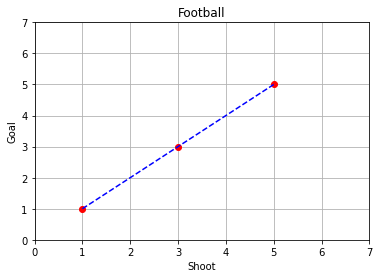

In [38]:
X2 = np.array([1, 3, 5])
y2 = np.array([1, 3, 5])

X2 = X2.reshape(-1, 1)

model.fit(X2, y2)

# 데이터 시각화

plt.figure()
plt.plot(X2, y2, 'ro') # 마커색상 + 마커모양 지정 (red, 동그라미 모양)
plt.plot(X2, model.predict(X2), 'b--')
plt.title('Football') # 그래프 제목
plt.xlabel('Shoot') # x축 이름
plt.ylabel('Goal') # y축 이름
plt.axis([0, 7, 0, 7]) # 축범위 지정 = axis[x축범위, y축범위]
plt.grid()  # 가로/세로 라인 출력(격자무늬)
plt.show()

- 데이터 프레임으로 작업 할 경우

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [40]:
data = {
    'shoot':[1, 3, 5],
    'goal':[1, 3, 5]
}

data = pd.DataFrame(data)
data

,shoot,goal
0,1,1
1,3,3
2,5,5


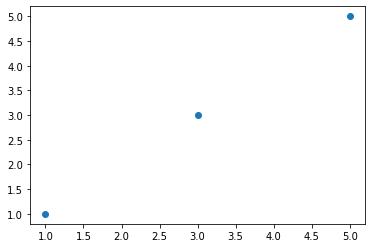

In [41]:
# 시각화

X = data['shoot']
y = data['goal']

plt.plot(X, y, 'o')
plt.show()

In [42]:
# 모델 생성 후 학습시킨다.

line_filter = LinearRegression()

line_filter.fit(X.values.reshape(-1, 1), y)

LinearRegression()

- 예측

In [43]:
line_filter.predict([[4]])

array([4.])

In [44]:
# 기울기 확인

line_filter.coef_

array([1.])

In [45]:
# 절편 확인

line_filter.intercept_

8.881784197001252e-16

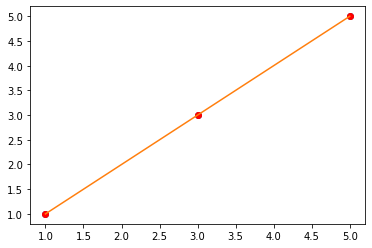

In [50]:
# X값으로 y를 예측해서 그래프 출력

plt.plot(X, y, 'o')
plt.plot(X, y, 'ro')
plt.plot(X, line_filter.predict(X.values.reshape(-1, 1)))
plt.show()

- 선형회귀 모델을 만들어 데이터를 학습시킨다.

<AxesSubplot:xlabel='shoot', ylabel='goal'>

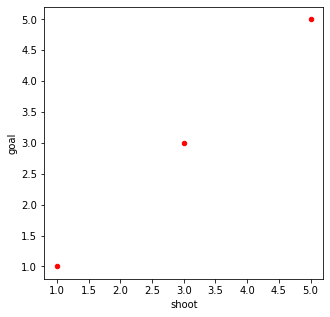

In [52]:
# 산점도로 데이터 출력

data.plot(kind='scatter',
         x='shoot', y='goal',
         figsize=(5, 5), 
         color='r')

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X=pd.DataFrame(data['x'], data['y']))

prediction = linear_regression.predict(X=pd.DataFrame(data['x']))

print("절편 : " , linear_regression.intercept_)
print("기울기 : ", linear_regression.coef_)

------------------------

# 실습 : 배달음식 소유시간

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [55]:
data = {
    'meter':[100, 150, 300, 400, 130],
    'min':[20, 24, 36, 47, 22]
}

data = pd.DataFrame(data)
data

,meter,min
0,100,20
1,150,24
2,300,36
3,400,47
4,130,22


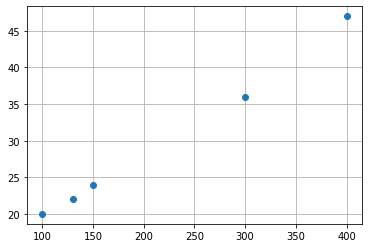

In [56]:
# 시각화

X = data['meter']
y = data['min']

plt.plot(X, y, 'o')
plt.grid()
plt.show()

In [58]:
model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [59]:
# 거리가 200미터인 경우 소요시간은?  --- 약 28분
model.predict([[200]])   # 예측값도 2차원값으로 설정해주어야 한다.

array([28.37810042])

In [61]:
# 기울기/절편 확인
print('기울기 :', model.coef_)
print('절편 : ', model.intercept_)

기울기 : [0.08886872]
절편 :  10.604355716878406


- 예측 그래프 출력

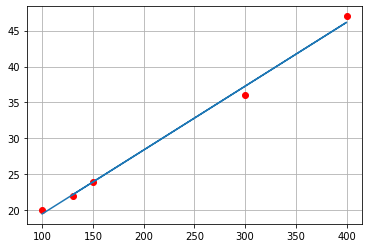

In [62]:
# X값으로 y를 예측해서 그래프 출력

plt.plot(X, y, 'ro')
plt.plot(X, model.predict(X.values.reshape(-1, 1)))
plt.grid()
plt.show()

------------------------------------------

# 실습 : 키와 몸무게

In [63]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- CSV 파일을 직접 생성할 경우

In [65]:
import random

# 출력파일 준비
fp = open('heights10.csv', 'w', encoding='utf-8')
fp.write('height, weight\r') # \r : 커서를 라인맨앞으로 이동시킨다.

# 무작위로 데이터 생성
for i in range(100000000):
    h = random.randint(150, 200)
    w = random.randint(50, 150)
    fp.write("{0}, {1}\r".format(h, w))
    
fp.close()
print('Done')

Done


In [71]:
df2 = pd.read_csv('heights10.csv')
df2.head()

,height,weight
0,193,102
1,197,92
2,152,56
3,185,117
4,175,80


- 미리 작성된 CSV 파일을 호출할 경우

In [66]:
df = pd.read_csv('heights2.csv')
df.head()

,height,weight
0,158.9,52.0
1,173.6,66.9
2,174.4,66.0
3,169.2,58.0
4,154.0,49.3


In [67]:
df.tail()

,height,weight
46,167.1,59.8
47,184.2,76.1
48,182.6,74.0
49,176.9,69.9
50,181.0,73.5


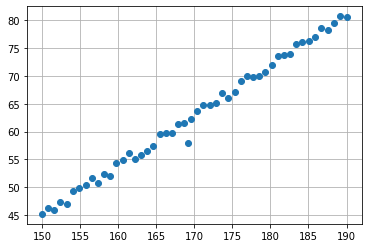

In [68]:
# 데이터 시각화
X = df['height']
y = df['weight']

plt.plot(X, y, 'o')
plt.grid()
plt.show()

In [69]:
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [70]:
model.predict([[183]])

array([74.57150777])

- 기울기/절편

In [72]:
model.coef_

array([0.8996501])

In [73]:
model.intercept_

-90.06446039185175

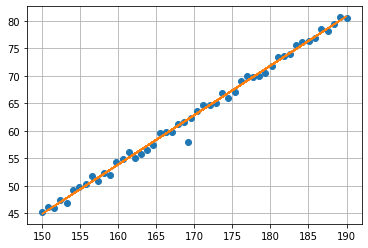

In [74]:
plt.plot(X, y, 'o')
plt.plot(X, model.predict(X.values.reshape(-1, 1)))
plt.grid()
plt.show()

-----------

# Keras 용어정리

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# 객체 생성
model = Sequential()

# 모델에 레이어 1개 추가하고, 그 노드에 입력값은 2개로 사용한다.
model.add(Dense(1, input_dim=2))

# 모델에 레이어를 추가하고, 시그모이드 활성화 함수를 사용한다.
model.add(Activation('sigmoid'))

# 모델의 형태와 정보를 출력한다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2021-11-27 12:36:55.625165: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


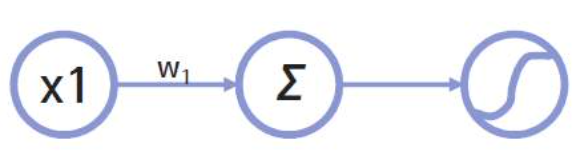

- 동그라미를 뉴런이라 한다. (또는 노드라고 한다.)
- x1 에 입력값이 두개가 들어온다.
- w1 : 가중치
- Dense는 동그라미 하나이다.

# Dense

- Dense 클래스를 이용하여 레이어의 노드를 만들며, Sequentioal 모델에 추가하면 다른 노드들과 연결된다.

In [ ]:
# 노드를 2개를 만들고 각각 노드에 입력값 2개를 넣는다.
model.add(Dense(2, input_dim=2)) 

-----------------------

# 실습 : 단일 입력 로지스틱회귀 모델

In [76]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import numpy as np

In [77]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [78]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

In [79]:
# 경사하강법과 손실함수는 이진 크로스 엔트로피를 사용한다.

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy',
             metrics=['binary_accuracy'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [80]:
# 모델링
# 임의의 숫자를 X에 대입, 숫자가 10 이상인 경우에는 1, 미만이면 0을 부여한 데이터를 y라고 할 때
# batch_size=1 은 1개의 x값에 대한 1개의 y값을 예측한다.
# epochs=200 은 전체 데이터를 200번 반복 학습한다.
# shuffle=False 는 항상 같은 데이터를 유지한다.

model.fit(X, y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 1ms/step - loss: 2.3475 - binary_accuracy: 0.7692 
Epoch 2/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2043 - binary_accuracy: 0.9231
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2020 - binary_accuracy: 0.9231
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 0.2000 - binary_accuracy: 0.9231
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1982 - binary_accuracy: 0.9231
Epoch 6/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1965 - binary_accuracy: 0.9231
Epoch 7/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1949 - binary_accuracy: 0.9231
Epoch 8/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1934 - binary_accuracy: 0.9231
Epoch 9/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1918 - binary_accuracy: 0.9231
Epoch 10/200
13/13 [=========================

13/13 [==============================] - 0s 1ms/step - loss: 0.1280 - binary_accuracy: 0.9231
Epoch 78/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1275 - binary_accuracy: 0.9231
Epoch 79/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1269 - binary_accuracy: 0.9231
Epoch 80/200
13/13 [==============================] - 0s 975us/step - loss: 0.1264 - binary_accuracy: 0.9231
Epoch 81/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1258 - binary_accuracy: 0.9231
Epoch 82/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1253 - binary_accuracy: 0.9231
Epoch 83/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1248 - binary_accuracy: 0.9231
Epoch 84/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1242 - binary_accuracy: 0.9231
Epoch 85/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1237 - binary_accuracy: 0.9231
Epoch 86/200
13/13 [============================

13/13 [==============================] - 0s 1ms/step - loss: 0.0987 - binary_accuracy: 0.9231
Epoch 154/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0984 - binary_accuracy: 0.9231
Epoch 155/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0981 - binary_accuracy: 0.9231
Epoch 156/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0979 - binary_accuracy: 0.9231
Epoch 157/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0976 - binary_accuracy: 0.9231
Epoch 158/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0974 - binary_accuracy: 0.9231
Epoch 159/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0971 - binary_accuracy: 0.9231
Epoch 160/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0969 - binary_accuracy: 0.9231
Epoch 161/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0966 - binary_accuracy: 0.9231
Epoch 162/200
13/13 [=====================

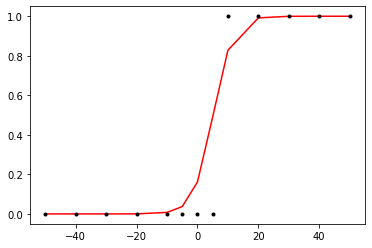

In [81]:
plt.plot(X, model.predict(X), 'r', X, y, 'k.')

x 값이 5와 10사이일 때 y 값이 0.5를 넘기 시작한다.

X == 5, y < 0.5, X > 5 , y > 0.5

- x값이 5보다 작을 값일 때 y값 출력

In [82]:
model.predict([1, 2, 3, 4, 4.5])

array([[0.2102595 ],
       [0.26861   ],
       [0.336259  ],
       [0.41136283],
       [0.45078573]], dtype=float32)

- x값이 5보다 클 경우 y값 출력

In [83]:
model.predict([5.5, 6, 7, 8, 9, 10])

array([[0.531005  ],
       [0.57077587],
       [0.64718616],
       [0.7167443 ],
       [0.7773076 ],
       [0.8280288 ]], dtype=float32)

---------------------

# 실습 : 타이타닉 생존 여부(단일 로지스틱회귀)

In [112]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.shape

(891, 12)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- int64 : 정수형, float64 : 소수형, object : 문자열

#### 데이터 누락
- Age          714 non-null    float64
- Cabin        204 non-null    object

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


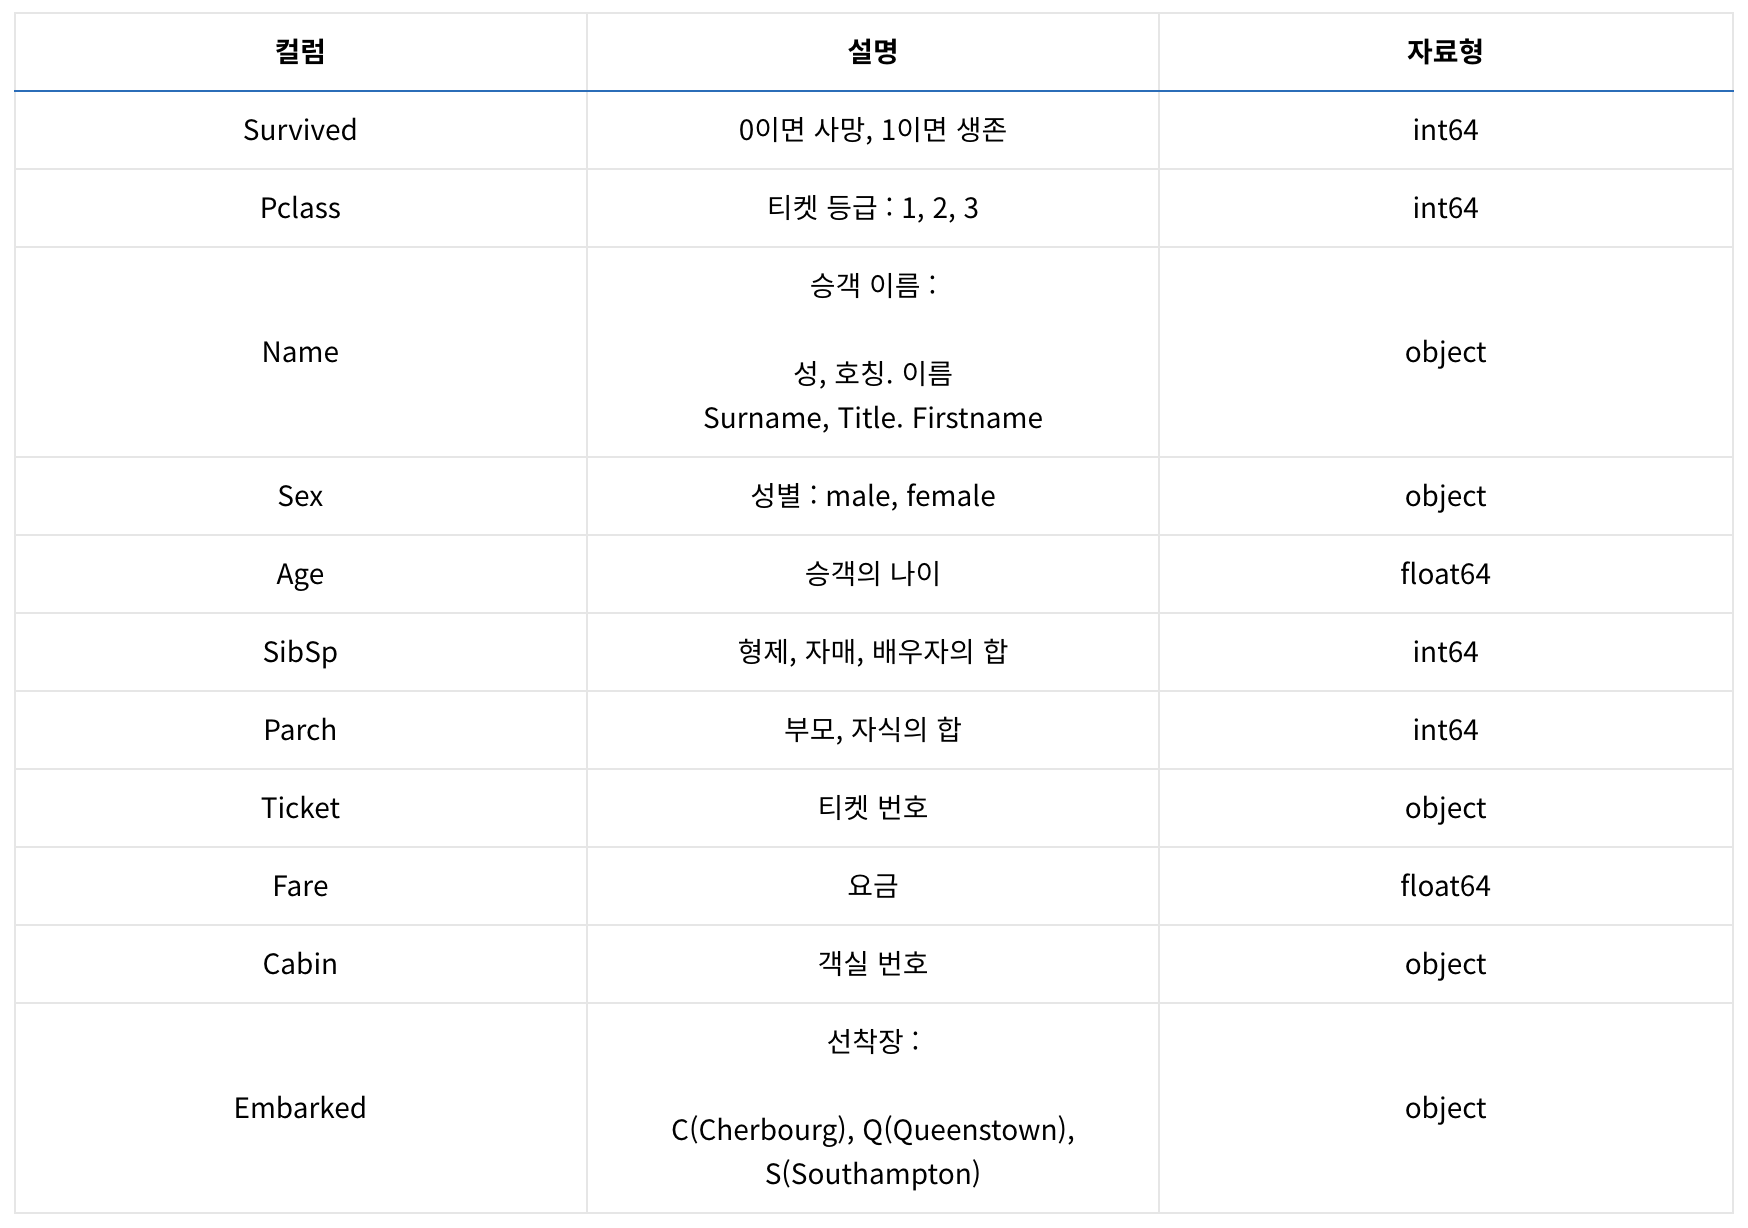

# 데이터 전처리

- 생존과 관련된 필드 : Sex, Age, Pclass
- 여성, 어린이, 1/2/3등석 순으로 생존확률이 높다고 가정할 경우
- 문자열을 숫자로 변환(one-hot-incoding) : 성별 -> 남자 : 0, 여자 : 1

In [115]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0})

# 결측치 : 누락된 데이터

### 결측치 데이터 채우기
1. 항목제거
2. 평균 빈 곳을 0이나 1로 채운다

In [116]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

- features 분리 : 객실등급

In [117]:
df['FirstClass'] = df['Pclass'].apply(lambda x : 1 if x==1 else 0)
df['SecondClass'] = df['Pclass'].apply(lambda x: 1 if x==2 else 0)

- 데이터 확인

In [118]:
features = df[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = df['Survived']

- 학습데이터와 테스트데이터 분리하기

In [119]:
# 학습용/테스트용을 선언하지 않으면 기본값으로 75%, 25%로 분할한다.

from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(features, survival)

In [120]:
train_data.shape

(668, 4)

In [121]:
test_data.shape

(223, 4)

- StandardScaler 를 사용하여 데이터의 정규화(스케일링)를 진행한다.

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [123]:
# 모델링 생성

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train_data, train_label)

LogisticRegression()

In [124]:
# 정확도 출력

model.score(train_data, train_label)

0.7904191616766467

In [98]:
# 테스트용 정확도

model.score(test_data, test_label)

0.8385650224215246

In [125]:
model.coef_

array([[ 1.19770092, -0.43549374,  0.87957056,  0.49219302]])

#### ['Sex', 'Age', 'FirstClass', 'SecondClass']

- 성별 : 1.1585
- 나이 : -0.388 (음수란 뜻은 나이가 많을 수록 생존확률이 낮아진다)로 해석
- 1등급 : 0.986 
- 2등급 : 0.52334

--> 2등급 보다는 1등급 생존확률이 높다

#### 예측

In [100]:
import numpy as np

hyun = np.array([1.0, 30.0, 1.0, 0.0])
jack = np.array([0.0, 20.0, 0.0, 0.0])
rose = np.array([1.0, 17.0, 1.0, 0.0])
gildong = np.array([0.0, 42.0, 0.0, 1.0])

sample_df = np.array([hyun, jack, rose, gildong])

In [101]:
sample_df = scaler.transform(sample_df)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [102]:
model.predict(sample_df)

array([1, 0, 1, 0])

In [127]:
import numpy as np

hyun2 = np.array([1.0, 30.0, 0.0, 0.0]) # 1등급에서 3등급으로 수정
jack2 = np.array([0.0, 20.0, 0.0, 0.0])
rose2 = np.array([1.0, 17.0, 1.0, 0.0])
gildong2 = np.array([0.0, 42.0, 0.0, 1.0])

sample_df2 = np.array([hyun2, jack2, rose2, gildong2])

sample_df2 = scaler.transform(sample_df2)

model.predict(sample_df2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1, 0, 1, 0])

### 생존 / 사망 확률 비교

In [128]:
model.predict_proba(sample_df)

array([[0.06254899, 0.93745101],
       [0.85598382, 0.14401618],
       [0.04050649, 0.95949351],
       [0.80228294, 0.19771706]])

# 다중입력 로지스틱 회귀 : AND 연산

In [129]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [130]:
model = Sequential()

# 2개의 입력을 받아서 1개의 출력을 생성한다.
model.add(Dense(input_dim=2, units=1))

# 이전 단계의 출력값을 입력으로 다시 리턴받아 시그모이드 출력한다.
model.add(Activation('sigmoid')) # 기준값 이하이면 0, 이상이면 1을 출력

# 경사하강법으로 학습을 진행하고 
# binary_accuracy는 출력값이 0.5 이상일 경우 1로 판단하고,
# 그렇지 않으면 0으로 판단한다.

model.compile(loss='binary_crossentropy', optimizer='sgd',
             metrics=['binary_accuracy'])

- AND 연산 데이터 생성

In [131]:
X = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 0, 0, 1])

In [ ]:
# 반복학습을 통해 최적의 w1, w2, b를 찾는다.



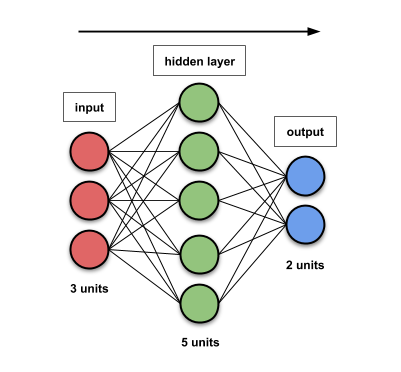

In [135]:
model.fit(X, y, epochs=5000, verbose=0) # verbose 0 이면 과정을 안보여줌. 1이면 출력

- 학습결과에 따른 실제 모델의 출력값 확인

In [136]:
model.predict(X)

array([[0.03254005],
       [0.22183478],
       [0.20461068],
       [0.68556654]], dtype=float32)

In [137]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


- 첫번째 레이어에 존재하는 w1, w2, b 확인

In [138]:
model.layers[0].weights

[<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.034479 ],
        [2.1371956]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-3.3922017], dtype=float32)>]

In [139]:
model.layers[0].get_weights()

[array([[2.034479 ],
        [2.1371956]], dtype=float32),
 array([-3.3922017], dtype=float32)]

-----------------

# 딥러닝

# AND, OR, XOR

In [140]:
import tensorflow as tf

tf.random.set_seed(678)

In [141]:
T = 1.0
F = 0.0
bias = 1.0

In [154]:
# AND 함수

def get_AND_data() :
    X = [
        [F, F, bias],
        [F, T, bias],
        [T, F, bias],
        [T, T, bias]
    ]
    
    y = [
        [F], [F], [F], [T]
    ]
    
    return X, y

In [143]:
# OR 함수

def get_OR_data() :
    X = [
        [F, F, bias],
        [F, T, bias],
        [T, F, bias],
        [T, T, bias]
    ]
    
    y = [
        [F], [T], [T], [T]
    ]
    
    return X, y

In [144]:
# XOR 함수

def get_XOR_data() :
    X = [
        [F, F, bias],
        [F, T, bias],
        [T, F, bias],
        [T, T, bias]
    ]
    
    y = [
        [F], [T], [T], [F]
    ]
    
    return X, y

- AND 연산을 할 경우

In [155]:
X, y = get_AND_data()

In [156]:
print(X)

[[0.0, 0.0, 1.0], [0.0, 1.0, 1.0], [1.0, 0.0, 1.0], [1.0, 1.0, 1.0]]


In [157]:
print(y)

[[0.0], [0.0], [0.0], [1.0]]


## 텐서플로우를 사용해 퍼셉트론을 구현한다.

In [158]:
class Perceptron:
    def __init__(self):
        # 논리연산을 위한 입력값 X, Y와 편향값 (b)를 받을 것이므로, weight를 [3,1]로 설정합니다.  
        # 3은 세개의 입력을 의미하고, 1은 한개의 뉴론임을 의미합니다.
        self.W = tf.Variable(tf.random.normal([3, 1]))
    
    def train(self,X):
        err = 1
        epoch, max_epochs = 0, 20
        while err > 0.0 and epoch < max_epochs:
            epoch += 1
            self.optimize(X)
            # MSE (평균제곱오차)를 관찰하며, 학습이 진행되는 동안, 에러(MSE)가 줄어듬을 확인합니다.
            err = self.mse(y, self.pred(X)).numpy()
            print('epoch:', epoch, 'mse:', err)
    
    
    # @tf.function 과 AutoGraph 모듈을 사용하여 자동으로 그래프로 변환해줍니다
    # Python code 함수를 정의하기 전에 @tf.function 데코레이터를 써주면 됩니다. 
    @tf.function
    def faster_pred(self, X):
        return self.step(tf.matmul(X, self.W))
    
    def pred(self, X):
        return self.step(tf.matmul(X, self.W))
       
    def mse(self, y, y_hat):
        return tf.reduce_mean(tf.square(tf.subtract(y, y_hat)))
    
    def step(self,x):
        # step(x) = { 1 if x > 0; 0 otherwise }
        return tf.dtypes.cast(tf.math.greater(x, 0), tf.float32)

    def optimize(self, X):
        """
        퍼셉트론은 경사하강법을 사용한 최적화가 불가능합니다.
        매번 학습을 진행할 때마다 가중치를 아래의 룰에 맞게 업데이트합니다.  

        if target == 1 and activation == 0:  
          w_new = w_old + input  

        if target == 0 and activation == 1:  
          w_new = w_old - input  

        위의 두가지 조건은 아래의 코드로 간단히 구현 가능합니다.  
        """
        delta = tf.matmul(X, tf.subtract(y, self.step(tf.matmul(X, self.W))), transpose_a=True)
        self.W.assign(self.W+delta)

In [159]:
perceptron = Perceptron()

In [160]:
perceptron.train(X)

epoch: 1 mse: 0.25
epoch: 2 mse: 0.5
epoch: 3 mse: 0.25
epoch: 4 mse: 0.25
epoch: 5 mse: 0.5
epoch: 6 mse: 0.25
epoch: 7 mse: 0.0


In [ ]:
perceptron.

In [ ]:
# 테스트 
perceptron.pred(X).numpy()

# 실행속도 확인 

In [ ]:
import timeit

# timeit 모듈은 전체 실행시간이 아닌 특정함수나 특정코드의 실행시간을 측정한다.

%timeit perceptron.pred(X).numpy()

#### 기본적인 AND GATE

In [161]:
import numpy as np

def AND_basic(x1, x2) :
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    
    if tmp <= theta :
        return 0
    elif tmp > theta:
        return 1

In [163]:
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in inputs:
    y = AND_basic(x1, x2)
    print("({0}, {1}) --> {2}".format(x1, x2, y))

(0, 0) --> 0
(0, 1) --> 0
(1, 0) --> 0
(1, 1) --> 1


#### 기본적인 OR GATE